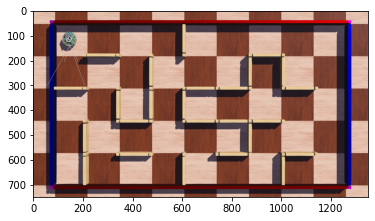

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Check the location of the robot
def robotCheck(xmin,ymin,xmax,ymax,robotMask):
    whitepixel = 0

    for i in range(xmin,xmax,1):
        for j in range(ymin,ymax,1):
            if robotMask[j][i] == 255:
                whitepixel=whitepixel+1
    
    return whitepixel

IMAGE_NAME = "..\Maze.png"
ROBOT_NAME = "..\Robot.png"
###########################################################################
#If transform fails, change the variable "dst" at the end of input[3]
###########################################################################
MAXY = 750
MAXX = 1350

img = cv.imread(IMAGE_NAME, cv.IMREAD_COLOR)
Maze = cv.imread(IMAGE_NAME, cv.IMREAD_COLOR)
MazeTf = cv.imread(IMAGE_NAME, cv.IMREAD_COLOR)
robot = cv.imread(ROBOT_NAME, cv.IMREAD_COLOR)

display = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(display)


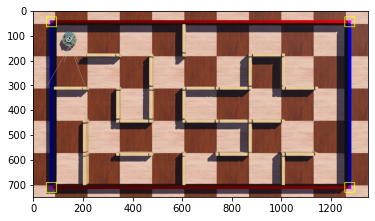

In [2]:
#cv.imshow('label',img)

lowerRange = (129,104,112)
upperRange = (157,255,255)
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img = cv.inRange(img,lowerRange,upperRange)

kernel = np.ones((1,2),np.uint8)
img = cv.erode(img, kernel)
kernel = np.ones((2,2),np.uint8)
img = cv.dilate(img, kernel)

#cv.imshow('Corner Mask',img)

contours = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

corners = contours[1]
corners1 = corners[1][2] #[cnt][counter]
corners2 = corners[1][2]

cX = []
cY = []
topLeftX = 0
topLeftY = 0
topLeftArea = 0
topLeftCount = 0
topRightX = 0
topRightY = 0
topRightArea = 0
topRightCount = 0
bottomLeftX = 0
bottomLeftY = 0
bottomLeftArea = 0
bottomLeftCount = 0
bottomRightX = 0
bottomRightY = 0
bottomRightArea = 0
bottomRightCount = 0

for cnt in range(len(corners)):
    M = cv.moments(corners[cnt], False)
    if int(M["m00"]) > 0:
        if (int(M["m10"]/(M["m00"])) < 338 and int(M["m01"]/(M["m00"])) < 375) and int(M["m00"])<1000 and int(M["m00"])>topLeftArea:
            topLeftX = topLeftX+int(M["m10"]/(M["m00"])) 
            topLeftY = topLeftY+int(M["m01"]/(M["m00"])) 
            topLeftCount = topLeftCount+1
            topLeftArea = int(M["m00"])

        if (int(M["m10"]/(M["m00"])) > 1000 and int(M["m01"]/(M["m00"])) > 375) and int(M["m00"])<1000 and int(M["m00"])>bottomRightArea:
            bottomRightX = bottomRightX+int(M["m10"]/(M["m00"]))
            bottomRightY = bottomRightY+int(M["m01"]/(M["m00"]))  
            bottomRightCount = bottomRightCount+1
            bottomRightArea = int(M["m00"])

        if (int(M["m10"]/(M["m00"])) > 1000 and int(M["m01"]/(M["m00"])) < 375) and int(M["m00"])<1000 and int(M["m00"])>topRightArea:
            topRightX = topRightX+int(M["m10"]/(M["m00"])) 
            topRightY = topRightY+int(M["m01"]/(M["m00"])) 
            topRightCount = topRightCount+1
            topRightArea = int(M["m00"])

        if (int(M["m10"]/(M["m00"])) < 338 and int(M["m01"]/(M["m00"])) > 375) and int(M["m00"])<1000 and int(M["m00"])>bottomLeftArea:
            bottomLeftX = bottomLeftX+int(M["m10"]/(M["m00"]))
            bottomLeftY = bottomLeftY+int(M["m01"]/(M["m00"]))
            bottomLeftCount = bottomLeftCount+1
            bottomLeftArea = int(M["m00"])


topLeftX = round(topLeftX/topLeftCount)
topLeftY = round(topLeftY/topLeftCount)
topRightX = round(topRightX/topRightCount)
topRightY = round(topRightY/topRightCount)
bottomLeftX = round(bottomLeftX/bottomLeftCount)
bottomLeftY = round(bottomLeftY/bottomLeftCount)
bottomRightX = round(bottomRightX/bottomRightCount)
bottomRightY = round(bottomRightY/bottomRightCount)

cv.rectangle(Maze,(topLeftX-20,topLeftY-20),(topLeftX+20,topLeftY+20),(0,255,255),2,cv.LINE_4,0)
cv.rectangle(Maze,(topRightX-20,topRightY-20),(topRightX+20,topRightY+20),(0,255,255),2,cv.LINE_4,0)
cv.rectangle(Maze,(bottomLeftX-20,bottomLeftY-20),(bottomLeftX+20,bottomLeftY+20),(0,255,255),2,cv.LINE_4,0)
cv.rectangle(Maze,(bottomRightX-20,bottomRightY-20),(bottomRightX+20,bottomRightY+20),(0,255,255),2,cv.LINE_4,0)

display = cv.cvtColor(Maze, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(display)

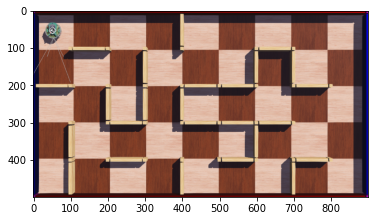

In [3]:
rangeX = 900
rangeY = 500

pts1 = np.float32([[topLeftX,topLeftY],[topRightX,topRightY],[bottomLeftX, bottomLeftY],[bottomRightX,bottomRightY]])
pts2 = np.float32([[0,0],[rangeX,0],[0,rangeY],[rangeX,rangeY]])

###########################################################################
#Change image transformed file here
H = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(MazeTf, H, (rangeX, rangeY))

###########################################################################
display = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(display)

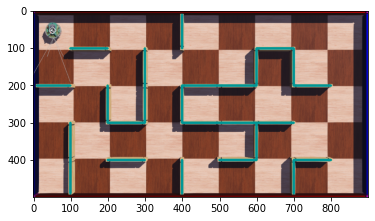

In [4]:
#MazeRobot = cv.warpPerspective(MazeTf, H, (rangeX, rangeY))

#cv.imshow('Transformed', MazeRobot)

hsvMaze = cv.cvtColor(dst, cv.COLOR_BGR2HSV) #image in BGR form
lowerRange = (15.3,0,217)
upperRange = (21,255,255)

hsvMaze = cv.inRange(hsvMaze,lowerRange,upperRange)

#cv.imshow('Wall Mask no filter', hsvMaze)

kernel = np.ones((1,1),np.uint8)
wallMask = cv.dilate(hsvMaze,kernel)
kernel = np.ones((1,3),np.uint8)
wallMask = cv.morphologyEx(wallMask, cv.MORPH_OPEN, kernel)

#cv.imshow('Wall Mask', wallMask)

#Horizontal Walls
wallSpots = 0
horWalls = [[0 for x in range(9)] for y in range(4)] 
for horcnt in range(0,9):
    colmin = horcnt*100+10
    colmax = horcnt*100+90
    for vertcnt in range(0,4):
        wallSpots = 0
        rowmin = vertcnt*100+95
        rowmax = vertcnt*100+105
        for row in range(rowmin,rowmax):
            for col in range(colmin,colmax):
                if wallMask[row][col] == 255:
                    wallSpots = wallSpots+1
        if wallSpots > 160:
            horWalls[vertcnt][horcnt] = 1
            if horcnt == 0:
                cv.line(dst,(colmin,round((rowmin+rowmax)/2)),(colmax+10,round((rowmin+rowmax)/2)),(150,150,0),5) 
            elif horcnt == 8:
                cv.line(dst,(colmin-10,round((rowmin+rowmax)/2)),(colmax,round((rowmin+rowmax)/2)),(150,150,0),5) 
            else:
                cv.line(dst,(colmin-10,round((rowmin+rowmax)/2)),(colmax+10,round((rowmin+rowmax)/2)),(150,150,0),5) 

#Vertical Walls
verWalls = [[0 for x in range(9)] for y in range(5)] 
for horcnt in range(0,9):
    colmin = horcnt*100+95
    colmax = horcnt*100+105
    for vertcnt in range(0,5):
        wallSpots = 0
        rowmin = vertcnt*100+10
        rowmax = vertcnt*100+90
        if horcnt < 8:
            for row in range(rowmin,rowmax):
                for col in range(colmin,colmax):
                    if wallMask[row][col] == 255:
                        wallSpots = wallSpots+1
            if wallSpots > 160:
                verWalls[vertcnt][horcnt] = 1
                if vertcnt == 0:
                    cv.line(dst,(round((colmin+colmax)/2),rowmin),(round((colmin+colmax)/2),rowmax+10),(150,150,0),5) 
                elif vertcnt == 4:
                    cv.line(dst,(round((colmin+colmax)/2),rowmin-10),(round((colmin+colmax)/2),rowmax),(150,150,0),5) 
                else:
                    cv.line(dst,(round((colmin+colmax)/2),rowmin-10),(round((colmin+colmax)/2),rowmax+10),(150,150,0),5) 
        else:
            verWalls[vertcnt][horcnt] = 1

#cv.imshow('Walls', dst)
display = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(display)

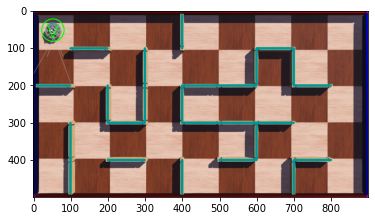

In [5]:
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_250)

parameters = cv.aruco.DetectorParameters_create()

markerCorners, markerIds, rejectedCandidates = cv.aruco.detectMarkers(robot, dictionary, parameters=parameters)

cv.aruco.drawDetectedMarkers(robot,markerCorners,markerIds)

markerCorners = markerCorners[0][0]

#cv.imshow('Markers', robot)

hsvRobot = cv.cvtColor(dst, cv.COLOR_BGR2HSV) #image in BGR form
lowerRange = (24.48,25,107)
upperRange = (115.74,148.12,255)

hsvRobot = cv.inRange(hsvRobot,lowerRange,upperRange)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(6,6))
robotMask = cv.dilate(hsvRobot,kernel)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
robotMask = cv.erode(robotMask,kernel)

#cv.imshow('Robot Mask', robotMask)

quadX = round(rangeX*1.5/9)
quadY = round(rangeY*1.5/5)
squareX = round(rangeX/9)
squareY = round(rangeY/5)

quadrant1 = robotCheck(0,0,quadX,quadY,robotMask)
quadrant2 = robotCheck((rangeX-quadX),0,rangeX,quadY,robotMask)
quadrant3 = robotCheck(0,rangeY-quadY,quadX,rangeY,robotMask)
quadrant4 = robotCheck(rangeX-quadX,rangeY-quadY,rangeX,rangeY,robotMask)

robotLocationX = 0
robotLocationY = 0
robotQuadrant = quadrant1

if quadrant2 > robotQuadrant:
    robotLocationX = 8
    robotLocationY = 0
    robotQuadrant = quadrant2

if quadrant3 > robotQuadrant:
    robotLocationX = 0
    robotLocationY = 4
    robotQuadrant = quadrant3

if quadrant4 > robotQuadrant:
    robotLocationX = 8
    robotLocationY = 4

robotContours = cv.findContours(robotMask, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
robotContours = robotContours[1]
contourArea = 0

for cnt in range(len(robotContours)):
    M = cv.moments(robotContours[cnt],False)
    if int(M["m00"]) > contourArea:
        contourArea = int(M["m00"])
        circleCentre = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))

dst = cv.circle(dst,circleCentre,30,(0,255,0),2)

if (markerCorners[0,0] < markerCorners[1,0] and markerCorners[0,0] < markerCorners[2,0] and markerCorners[0,0] < markerCorners[3,0]):
    direction = "<" #W
    cv.line(dst,(circleCentre[0]-20,circleCentre[1]),(circleCentre[0]+15,circleCentre[1]+15),(0,255,0),2)
    cv.line(dst,(circleCentre[0]-20,circleCentre[1]),(circleCentre[0]+15,circleCentre[1]-15),(0,255,0),2)
elif (markerCorners[0,0] > markerCorners[1,0] and markerCorners[0,0] > markerCorners[2,0] and markerCorners[0,0] > markerCorners[3,0]):
    direction = ">" #E
    cv.line(dst,(circleCentre[0]+20,circleCentre[1]),(circleCentre[0]-15,circleCentre[1]+15),(0,255,0),2)
    cv.line(dst,(circleCentre[0]+20,circleCentre[1]),(circleCentre[0]-15,circleCentre[1]-15),(0,255,0),2)
elif (markerCorners[0,1] < markerCorners[1,1] and markerCorners[0,1] < markerCorners[2,1] and markerCorners[0,1] < markerCorners[3,1]):
    direction = "^" #N
    cv.line(dst,(circleCentre[0],circleCentre[1]-20),(circleCentre[0]+15,circleCentre[1]+15),(0,255,0),2)
    cv.line(dst,(circleCentre[0],circleCentre[1]-20),(circleCentre[0]-15,circleCentre[1]+15),(0,255,0),2)
elif (markerCorners[0,1] > markerCorners[1,1] and markerCorners[0,1] > markerCorners[2,1] and markerCorners[0,1] > markerCorners[3,1]):
    direction = "v" #S
    cv.line(dst,(circleCentre[0],circleCentre[1]+20),(circleCentre[0]+15,circleCentre[1]-15),(0,255,0),2)
    cv.line(dst,(circleCentre[0],circleCentre[1]+20),(circleCentre[0]-15,circleCentre[1]-15),(0,255,0),2)
dst = cv.resize(dst,(900,500))

#cv.imshow('Detected Robot', dst)

display = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(display)

In [ ]:
MapFound = open(r"..\MapFound.txt", "w")
OutsideHorWall = " --- --- --- --- --- --- --- --- --- \n"
MapFound.write(OutsideHorWall)

vCounter = 0
hCounter = 0

while(vCounter < 5 and hCounter < 5):

    if vCounter < 5: #range is 5
        MapFound.write("|")
        for vArrayCounter in range(9):
            if verWalls[vCounter][vArrayCounter] == 1:
                if robotLocationY == vCounter and robotLocationX == vArrayCounter:
                    MapFound.write(" ")
                    MapFound.write(direction)
                    MapFound.write(" |")
                else:
                    MapFound.write("   |")
            else:
                if robotLocationY == vCounter and robotLocationX == vArrayCounter:
                    MapFound.write(" ")
                    MapFound.write(direction)
                    MapFound.write("  ")
                else:
                    MapFound.write("    ")
        MapFound.write("\n")  

    if hCounter < 4: #range is 4
        MapFound.write(" ")
        for hArrayCounter in range(9):
            if horWalls[hCounter][hArrayCounter] == 1:
                MapFound.write("--- ")
            else:
                MapFound.write("    ")
        MapFound.write(" \n")
        
    hCounter = hCounter+1
    vCounter = vCounter+1

MapFound.write(OutsideHorWall)
MapFound.close()
cv.waitKey(0)
cv.destroyAllWindows()